1. Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод

In [3]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

X_st = X.copy().astype(np.float64)
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])

X_st

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [19]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    w_list = []
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        w_list = np.append(w_list, W)
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return w_list, reg

Iter: 0, weights: [ 0.64988643 -0.37964949  0.25677548 -0.88414924], error 3448.3024024094802
Iter: 500, weights: [56.49488523  5.87620067  1.36894938  5.21338533], error 25.419101936484402
Iter: 1000, weights: [56.49717505  6.1718704   0.2584356   6.06745588], error 24.97117746937121
Iter: 1500, weights: [56.49717514  6.25657369 -0.13427816  6.38840082], error 24.913340167218717
Iter: 2000, weights: [56.49717514  6.28593854 -0.27521328  6.50456418], error 24.90579125631626
Iter: 2500, weights: [56.49717514  6.29644621 -0.32589848  6.54639104], error 24.904791190850286
Iter: 3000, weights: [56.49717514  6.30022356 -0.34413214  6.56144056], error 24.90465346938457
Iter: 3500, weights: [56.49717514  6.30158236 -0.35069186  6.56685489], error 24.904632663735224
Iter: 4000, weights: [56.49717514  6.30207119 -0.35305179  6.56880276], error 24.90462889858663
Iter: 4500, weights: [56.49717514  6.30224706 -0.3539008   6.56950352], error 24.904628025494063
Final MSE: 24.90462777370393


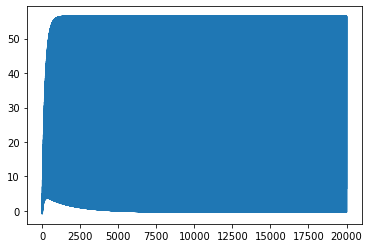

In [22]:
w_list, reg = gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-2, reg=1e-4)
w_list, reg
plt.plot(w_list)
plt.plot(reg)

Не совсем понял, что нужно изобразить постараюсь доделать и прикрепить к след дз

2. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

In [49]:


def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    W_list = list
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        # Изменения 
        dReg = reg * (W / abs(W)) # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W



In [50]:
gradient_descent_reg_l1(X_st, y, iterations=5000, eta=1e-2, reg=1e-4)

Iter: 0, weights: [ 0.55338421  1.06569842  0.80463473 -0.26608795], error 3398.9772350013277
Iter: 500, weights: [56.49765485  5.9180303   1.3044141   5.23971159], error 25.384884940985202
Iter: 1000, weights: [56.49994991  6.1780229   0.23714238  6.08354907], error 24.966731895730597
Iter: 1500, weights: [56.49995     6.25866242 -0.14271743  6.39525883], error 24.91268334234924
Iter: 2000, weights: [56.49995     6.28700196 -0.27910813  6.50775127], error 24.905673743530766
Iter: 2500, weights: [56.49995     6.29717358 -0.32819171  6.54826026], error 24.904759197153346
Iter: 3000, weights: [56.49995     6.30083328 -0.34585847  6.56284207], error 24.90463840741761
Iter: 3500, weights: [56.49995     6.30215049 -0.35221744  6.56809071], error 24.90462192919493
Iter: 4000, weights: [56.49995     6.3026246  -0.3545063   6.56997992], error 24.904619495934817
Iter: 4500, weights: [56.49995     6.30279525 -0.35533016  6.57065993], error 24.904619073288835
Final MSE: 24.904618979874755


array([56.49995   ,  6.30285661, -0.35562635,  6.57090441])